<a href="https://colab.research.google.com/github/Jaydenzk/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

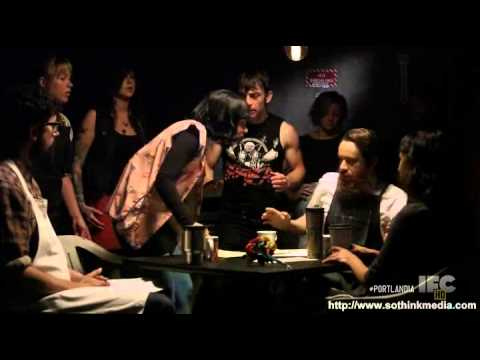

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [0]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [13]:
!pip install squarify

In [0]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [0]:
# Start here 

def wrangle(df):
    df = df.copy()
    
    df['star_rating'] = df['star_rating'].str.replace('star rating', '').astype(float)
    
    df['date'] = df['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")
    df['date'] = pd.to_datetime(df['date'])
    
    df['full_review_text'] = df['full_review_text'].str.replace('(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)', '')
    df['full_review_text'] = df['full_review_text'].str.replace('(\d*)', '').str.strip().str.lstrip('check-in ')
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.lower())
    
    df['coffee_shop_name'] = df['coffee_shop_name'].str.strip()
    
    df['positive_review'] = df['star_rating'] >= 3.0
    
    return df

In [3]:
df = wrangle(shops)
df.head()

,coffee_shop_name,full_review_text,star_rating,date,positive_review
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5.0,2016-11-25,True
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,2016-12-02,True
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,2016-11-30,True
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2.0,2016-11-25,False
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,2016-12-03,True


In [4]:
df['coffee_shop_name'].value_counts()

Epoch Coffee                           400
Halcyon                                300
The Factory - Cafe With a Soul         244
Houndstooth Coffee                     200
Venezia Italian Gelato                 200
Caffé Medici                           143
Apanas Coffee & Beer                   136
La Tazza Fresca                        100
Radio Coffee & Beer                    100
Cream Whiskers                         100
Hot Mama’s Cafe                        100
Dominican Joe                          100
Kick Butt Coffee Music & Booze         100
Figure 8 Coffee Purveyors              100
Cenote                                 100
Live Oak Market                        100
Pacha                                  100
Café Crème                             100
Mozart’s Coffee Roasters               100
Jo’s Coffee                            100
Caffe Medici                           100
Summer Moon Coffee Bar                 100
Thunderbird Coffee                     100
La Patisser

In [5]:
df = df[df['coffee_shop_name'] == 'Strange Brew, Austin Coffee']
print(df.shape)
df.head()

(100, 5)


,coffee_shop_name,full_review_text,star_rating,date,positive_review
6372,"Strange Brew, Austin Coffee","with great coffee drinks, google fiber interne...",4.0,2016-09-30,True
6373,"Strange Brew, Austin Coffee",i've been here twice to work. the coffee isn'...,2.0,2016-10-09,False
6374,"Strange Brew, Austin Coffee","whether you're there to study, hang out, or li...",5.0,2016-07-26,True
6375,"Strange Brew, Austin Coffee",one of the staff scolded and embarrassed this ...,1.0,2016-11-22,False
6376,"Strange Brew, Austin Coffee",reviewing from the coffee house aspect... i ca...,2.0,2016-07-19,False


In [7]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [8]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=0e507bd700e6e50e36cb5e35b51ff8bf53489c37b4f1973651fb0b124f0c95e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-sedkyhgy/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [9]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [0]:
def lemma(text):

    lemmas = []
    
    STOPWORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'shop'])
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text not in STOPWORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
df['tokens'] = df['full_review_text'].apply(lemma)

In [10]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,positive_review,tokens
6372,"Strange Brew, Austin Coffee","with great coffee drinks, google fiber interne...",4.0,2016-09-30,True,"[great, drink, google, fiber, internet, plenty..."
6373,"Strange Brew, Austin Coffee",i've been here twice to work. the coffee isn'...,2.0,2016-10-09,False,"[twice, work, bad, plenty, parking, table, wor..."
6374,"Strange Brew, Austin Coffee","whether you're there to study, hang out, or li...",5.0,2016-07-26,True,"[study, hang, listen, live, music, cover, good..."
6375,"Strange Brew, Austin Coffee",one of the staff scolded and embarrassed this ...,1.0,2016-11-22,False,"[staff, scold, embarrass, guy, sit, lounge, ch..."
6376,"Strange Brew, Austin Coffee",reviewing from the coffee house aspect... i ca...,2.0,2016-07-19,False,"[review, house, aspect, come, work, dog, get, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [0]:
# From lecture note copy&paste

from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
wc = count(df['tokens'])

In [16]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
26,place,58,92,1.0,0.017944,0.017944,0.58
28,good,41,69,2.0,0.013458,0.031402,0.41
78,music,37,68,3.0,0.013263,0.044665,0.37
92,brew,38,66,4.0,0.012873,0.057539,0.38
95,strange,34,60,5.0,0.011703,0.069241,0.34


In [19]:
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('place', 92),
 ('good', 69),
 ('music', 68),
 ('brew', 66),
 ('strange', 60),
 ('like', 58),
 ('great', 52),
 ('room', 52),
 ('study', 51),
 ('time', 51)]

**View Counts by Rating**

In [0]:
bad_reviews = df[df['star_rating'] <= 3.0]
bad_wc = count(bad_reviews['tokens'])

good_reviews = df[df['star_rating'] >= 4.0]
good_wc = count(good_reviews['tokens'])

In [27]:
bad_reviews.head(), bad_wc.head()

(                 coffee_shop_name  ...                                             tokens
 6373  Strange Brew, Austin Coffee  ...  [twice, work, bad, plenty, parking, table, wor...
 6375  Strange Brew, Austin Coffee  ...  [staff, scold, embarrass, guy, sit, lounge, ch...
 6376  Strange Brew, Austin Coffee  ...  [review, house, aspect, come, work, dog, get, ...
 6377  Strange Brew, Austin Coffee  ...  [check, yelp, get, discount, score, bargain, l...
 6378  Strange Brew, Austin Coffee  ...  [decent, easy, lay, atmosphere, drop, pen, flo...
 
 [5 rows x 6 columns],
      word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
 80  place          24     38   1.0   0.018528       0.018528           0.600
 46   time          16     27   2.0   0.013164       0.031692           0.400
 24   work          15     25   3.0   0.012189       0.043881           0.375
 17   like          13     25   4.0   0.012189       0.056070           0.325
 91   come          13     21   5.0   0

In [28]:
good_reviews.head(), good_wc.head()

(                 coffee_shop_name  ...                                             tokens
 6372  Strange Brew, Austin Coffee  ...  [great, drink, google, fiber, internet, plenty...
 6374  Strange Brew, Austin Coffee  ...  [study, hang, listen, live, music, cover, good...
 6379  Strange Brew, Austin Coffee  ...  [s, friend, kendall, cake, maker, order, good,...
 6380  Strange Brew, Austin Coffee  ...  [place, expand, great, local, establishment, g...
 6384  Strange Brew, Austin Coffee  ...  [true, hole, wall, ton, space, outlet, friendl...
 
 [5 rows x 6 columns],
         word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
 26     place          34     54   1.0   0.017555       0.017555        0.566667
 28      good          29     52   2.0   0.016905       0.034460        0.483333
 102     brew          29     51   3.0   0.016580       0.051040        0.483333
 43     music          28     50   4.0   0.016255       0.067295        0.466667
 106  strange          2

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


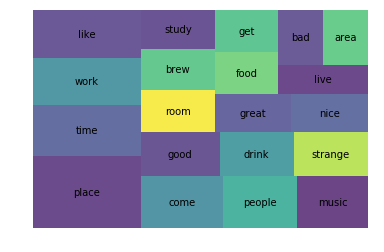

In [29]:
wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

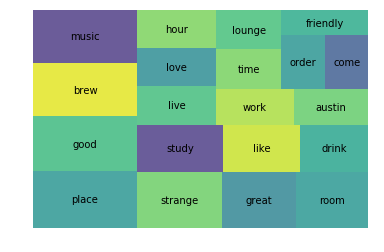

In [30]:
wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

